# **Trabajo Práctico 1**
### Análisis Numérico 1 - 1er cuatrimestre 2022
### **_Búsqueda de raíces e interpolación_**


> Platini Rocío - 107456   
> Harriet Eliana - 107205

In [ ]:
from matplotlib import pyplot as plt

## 1. Plan de Producción

### a. Formulación del problema
El problema consiste en hallar la cantidad mínima de acero "E41" a fabricar para alcanzar la contribución mensual solicitada por la empresa. Para que el mismo pueda fabricarse, se requiere superar los 827 kilogramos producidos por mes, ya que de lo contrario, no es rentable hacer el set up para prender la máquina que se utiliza para la producción del acero.
Para modelar el problema, buscamos una función que informe la contribución mensual (conociendo la rentabilidad unitaria) del producto según los kilogramos fabricados.


\begin{align}
f(x) = 0,001x^{3}-2x^{2}+1000x - 25000
\end{align}

Si hallamos la raíz de este polinomio, esta nos dará la información para saber la cantidad mínima de kilogramos de acero a producir, cumpliendo los requerimientos de la empresa.


### Gráfico de la función


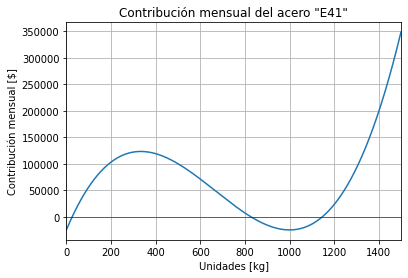

In [ ]:
def f(x):
    return (0.001)*(x**3) - 2*(x**2) + 1000*x - 25000

x = range(0, 1500)
plt.plot(x, [f(i) for i in x])
plt.axhline(0, color='black', linewidth=1, alpha=0.5);

plt.xlabel('Unidades [kg]')
plt.ylabel('Contribución mensual [$]')
plt.title('Contribución mensual del acero "E41"')

plt.xlim(0, 1500)
plt.grid()
plt.show()

Este polinomio tiene tres raíces, pero cumpliendo la condición de que la cantidad de kilogramos de acero sea mayor a 827 la raíz es única.

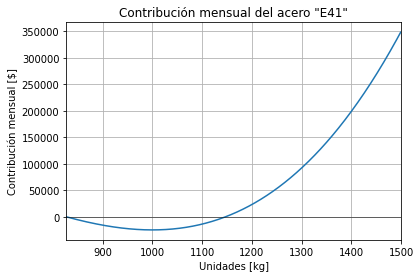

In [ ]:
x = range(827, 1500)
plt.plot(x, [f(i) for i in x])
plt.axhline(0, color='black', linewidth=1, alpha=0.5);

plt.xlabel('Unidades [kg]')
plt.ylabel('Contribución mensual [$]')
plt.title('Contribución mensual del acero "E41"')

plt.xlim(827, 1500)
plt.grid()
plt.show()

###Aclaración 
Al calcular la raíz de la función con la cota $\varepsilon < 1\times 10^{-13}$, nos dimos cuenta de que la diferencia de la raiz entre 2 iteraciones consecutivas da 0 (o se aproxima, pero como es tan pequeño el programa lo redondea a 0). Por lo tanto, decidimos agrandar la cota, ya que con la del enunciado los resultados no son correctos. Dependiendo la convergencia de cada algoritmo, modificamos la cota.

A continuacion, definimos las siguientes funciones que serán utilizadas para programar los métodos de búsqueda.

In [ ]:
from tabulate import tabulate
import math as m
from matplotlib import pyplot as plt

#cargamos las funciones f y g y sus derivadas 
def f(x):
    return (0.001)*(x**3) - 2*(x**2) + 1000*x - 25000

def f_derivada(x):
    return  (0.003)*(x**2) - 4*x + 1000

def f_derivada_segunda(x):
    return (0.006)*x - 4

def g(x):
  return 25 + 0.002*(x**2) - 0.000001*(x**3)

def g_derivada(x):
  return 0.004*x - 0.000003*(x**2)

def error_absoluto(p, p0):
    return abs(p - p0)

# funciones para calcular las constantes asintoticas y ordenes de convergencia
def constanteAsintotica(iteraciones, alfa):
    constantes = []
    for i in range(0, len(iteraciones)-1):
          if i < 2:
              constantes.append(0)
          else:
                error_nMas1 = abs(iteraciones[i] - iteraciones[i-1])
                error_n = abs(iteraciones[i-1] - iteraciones[i-2])
                constante = error_nMas1/(error_n**alfa)
                constantes.append(constante)

    return constantes

def ordenConvergencia(iteraciones, tolerancia):
    orden = []

    for i in range(0, len(iteraciones)-1):
        if i < 3:
            orden.append(0)
        else:
            error_nMas1 = iteraciones[i] - iteraciones[i-1]
            error_n = iteraciones[i-1] - iteraciones[i-2]
            error_nMenos1 = iteraciones[i-2] - iteraciones[i-3]

            if (error_nMas1 > tolerancia) or (error_n > tolerancia) or (error_nMenos1 > tolerancia):
                logNumerador = m.log(abs(error_nMas1/error_n))
                logDenominador = m.log(abs(error_n/error_nMenos1))
                alfa = logNumerador/logDenominador
                orden.append(alfa)
            else:
                orden.append(orden[-1])
    return orden

# funciones para imprimir los datos y graficos obtenidos mediante los algoritmos de busqueda
def graficar(puntos, limInicialY, limFinalY):
    plt.plot(puntos)
    plt.grid()
    plt.ylim(limInicialY, limFinalY)
    plt.show()


def graficoLogErroresVsIteraciones(iteraciones):
    logErrores = []
    for i in range(0, len(iteraciones)-1):
        if i > 1:
            error = abs(iteraciones[i] - iteraciones[i-1])
            logErrores.append(m.log(error))
    
    graficar(logErrores, -30, 5)



def imprimirDatosYGraficosObtenidos(iteraciones, convergencias, constantes, errores):
    datos = [['Iteracion', 'Raiz', 'Error', 'Orden de convergencia', 'Constante asintotica']]

    for i in range(0, len(iteraciones)-1):
        if (i < 5) or (i >= (len(iteraciones)-6)):
            iteracion = [i+1, iteraciones[i], errores[i], convergencias[i], constantes[i]]
            datos.append(iteracion)

    print('\nTABLA CON LOS DATOS OBTENIDOS\n')
    print(tabulate(datos))

    print('\nGrafico del orden de convergencia\n')
    graficar(convergencias, 0, 5)

    print('\nGrafico de la constante asintotica\n')
    graficar(constantes, 0, 2)

    print('\nGrafico del de log de la variacion de x en funcion de las iteraciones\n')
    graficoLogErroresVsIteraciones(iteraciones)





### Método de bisección

Mediante el algoritmo de Bisección, buscamos la raíz de la función que satisface las condiciones. A partir del gráfico, podemos ver que la raíz buscada debe estar entre el intervalo [900; 1200] aproximadamente (usaremos este intervalo para calcularla). 
Utilizando el criterio del error absoluto entre 2 iteraciones consecutivas de la raíz, llegamos a los resultados:  

- Con la cota $\varepsilon < 1\times 10^{-5}$ la raíz encontrada es: 1147.59629 $±$ 0.00001, usando N = 34 iteraciones.
- Con la cota $\varepsilon < 1\times 10^{-11}$ la raíz encontrada es: 1147.59628853459 $±$ 0.00000000001, usando N = 44 iteraciones.

### Ventajas y desventajas del algoritmo

Las ventajas del método de Bisección son que su implementación es sencilla, no necesitamos conocer las derivadas de la función (ni hallar otras), y sólo necesitamos una semilla. Sin embargo, la desventaja de este algoritmo es que no es demasiado eficiente, ya que su orden de convergencia es lineal; esto significa que se necesitan muchas iteraciones para hallar la raíz de una función con una cota de error pequeña.

### Algoritmo de bisección y tabla con los datos obtenidos 


Biseccion con cota de error 1e-5
La raiz encontrada es: 1147.5962966680527, usando N = 24 iteraciones.

TABLA CON LOS DATOS OBTENIDOS

---------  ------------------  ----------------------  ---------------------  --------------------
Iteracion  Raiz                Error                   Orden de convergencia  Constante asintotica
1          1050.0              150.0                   0                      0
2          1125.0              75.0                    0                      0
3          1162.5              37.5                    0                      0.5
4          1143.75             18.75                   1.0                    0.5
5          1153.125            9.375                   1.0                    0.5
20         1147.5960731506348  0.000286102294921875    1.0                    0.5
21         1147.5962162017822  0.0001430511474609375   1.0                    0.5
22         1147.596287727356   7.152557373046875e-05   1.0                    0.5
23         114

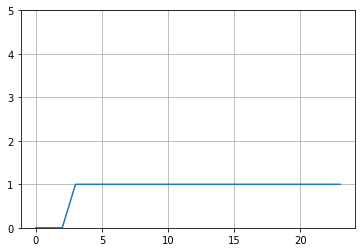


Grafico de la constante asintotica



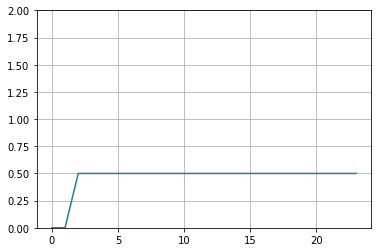


Grafico del de log de la variacion de x en funcion de las iteraciones



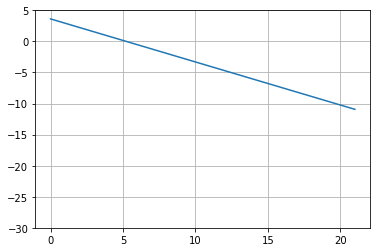


Biseccion con cota de error 1e-11
La raiz encontrada es: 1147.5962885345866, usando N = 44 iteraciones.

TABLA CON LOS DATOS OBTENIDOS

---------  ------------------  ----------------------  ---------------------  --------------------
Iteracion  Raiz                Error                   Orden de convergencia  Constante asintotica
1          1050.0              150.0                   0                      0
2          1125.0              75.0                    0                      0
3          1162.5              37.5                    0                      0.5
4          1143.75             18.75                   1.0                    0.5
5          1153.125            9.375                   1.0                    0.5
40         1147.5962885347144  2.7284841053187847e-10  1.0                    0.5
41         1147.596288534578   1.3642420526593924e-10  1.0                    0.5
42         1147.5962885346462  6.821210263296962e-11   1.0                    0.5
43         11

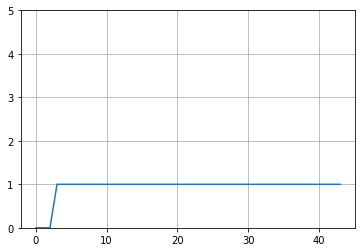


Grafico de la constante asintotica



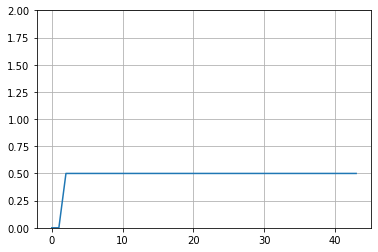


Grafico del de log de la variacion de x en funcion de las iteraciones



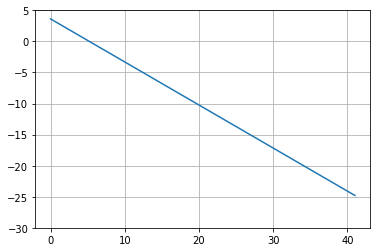

In [ ]:
def biseccion(a, b, tolerancia, nIteraciones):
    if f(a)*f(b) > 0:
        print(f'No hay ninguna raiz en el intervalo [{a},{b}]')
        return None

    p0 = a
    historia = []
    errores = []

    i = 1
    while i < nIteraciones:
        p = (a+b)/2
        error = error_absoluto(p, p0)

        historia.append(p)
        errores.append(error)

        if error < tolerancia:
            return historia, errores

        if f(p) * f(a) > 0:
            a = p
        else:
            b = p
        
        p0 = p
        i+=1

    return None

def ejecutar_algoritmo(tolerancia, nMax, a, b):
    iteraciones, errores = biseccion(a, b, tolerancia, nMax)

    if iteraciones != None:
        print(f'La raiz encontrada es: {iteraciones[-1]}, usando N = {len(iteraciones)-1} iteraciones.')

        convergencias = ordenConvergencia(iteraciones, tolerancia)
        constantes = constanteAsintotica(iteraciones, convergencias[-1])
        imprimirDatosYGraficosObtenidos(iteraciones, convergencias, constantes, errores)

    else:
        print(f'Error, la funcion no convergio en {nMax} iteraciones con una tolerancia de {tolerancia}.')
    
def main():
    print('\nBiseccion con cota de error 1e-5')
    ejecutar_algoritmo(1e-5, 100, 900, 1200)
    print('\nBiseccion con cota de error 1e-11')
    ejecutar_algoritmo(1e-11, 100, 900, 1200)
    
main()

### Método de Punto Fijo


Para utilizar el método, debemos hallar una función g(x) tal que 

 \begin{align} f(x) = g(x) - x \end{align}
 Proponemos \begin{align} g(x) = 25 + 0.002x^{2} - 0.000001x^{3} \end{align}

 Tomando el intervalo $[1100; 1200]$, se deben cumplir las condiciones que aseguren la existencia de un punto fijo en el intervalo elegido, y que sea único.
 
 1. g(x) $\in [1100,1200]$  $\forall x \in [1100, 1200] \Rightarrow$ g tiene al menos un punto fijo en $[1100,1200]$ 

 2. si $\exists$  $g'(x) \forall x\in [1100,1200]$ y $\exists$  $0 < k < 1$ $/$  $\forall x \in (1100,1200)$ se cumple que $|g'(x)|$ $\leq$ $k$ $\Rightarrow$ el punto fijo es único en ese intervalo.

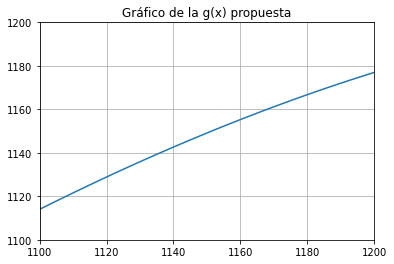

In [ ]:
from matplotlib import pyplot as plt

x = range(0, 1500)
plt.plot(x, [g(i) for i in x])

plt.title('Gráfico de la g(x) propuesta')

plt.xlim(1100, 1200)
plt.ylim(1100,1200)
plt.grid()
plt.show()

Observando el gráfico, se puede ver que se cumple la primer condición.


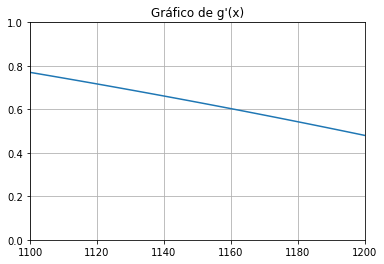

In [ ]:
x = range(0, 1500)
plt.plot(x, [g_derivada(i) for i in x])

plt.title("Gráfico de g'(x)")

plt.xlim(1100, 1200)
plt.ylim(0,1)
plt.grid()
plt.show()

Mediante este gráfico probamos que el punto fijo en el intervalo $[1100, 1200]$ es único.

Utilizando la semilla $p_{0} =$ 1100:
-  Con la cota $\varepsilon < 1\times 10^{-5}$ la raíz encontrada es: 1147.59627 $\pm$ 0.00001, usando N = 34 iteraciones.
-  Con la cota $\varepsilon < 1\times 10^{-11}$ la raíz encontrada es: 1147.59628853457 $\pm$ 0.00000000001, usando N = 65 iteraciones.

### Ventajas y desventajas del algoritmo
Las ventajas de este método son que su implementación es muy sencilla, ya que en las iteraciones sólo debemos evaluar a la función g en la semilla anterior, y además, no necesitamos conocer la derivada de la función. Este algoritmo tiene varias desventajas: la primera, es que debemos hallar una función g (y su derivada) que satisfaga las condiciones de punto fijo, y que sea único en el intervalo elegido. Esta condición a veces no es tan fácil de cumplir. Además, su convergencia es supralineal (está entre lineal y cuadrática) y al igual que con el método de bisección, se necesitan muchas iteraciones para cumplir con la cota de error pedida. Además, se necesita elegir una semilla que esté muy próxima a la raíz, ya que de lo contrario, el método diverge.
En base a los datos obtenidos, concluimos que 


### Algoritmo de punto fijo y tabla tabla de datos obtenidos


Punto fijo con cota de error 1e-5
La raiz encontrada es: 1147.5962721753383, usando N = 34 iteraciones.

TABLA CON LOS DATOS OBTENIDOS

---------  ------------------  ----------------------  ---------------------  --------------------
Iteracion  Raiz                Error                   Orden de convergencia  Constante asintotica
1          1100                14.0                    0                      0
2          1114.0              10.522456000000147      0                      0
3          1124.5224560000001  7.563332417529182       0                      0.7516034324528553
4          1132.0857884175293  5.248889250905222       1.1563814943370807     0.7187796579330354
5          1137.3346776684346  3.5489425409866726      1.1062861339534587     0.6939912094825623
30         1147.596135525094   5.5167014124890557e-05  1.0000017449548624     0.6394559444761959
31         1147.5961906921082  3.527675653458573e-05   1.0000010964309078     0.6394557127899735
32         1147.5962

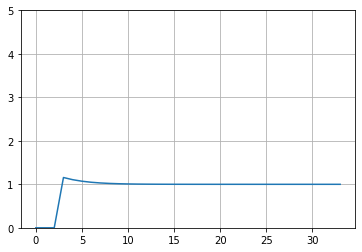


Grafico de la constante asintotica



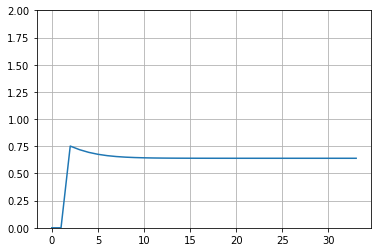


Grafico del de log de la variacion de x en funcion de las iteraciones



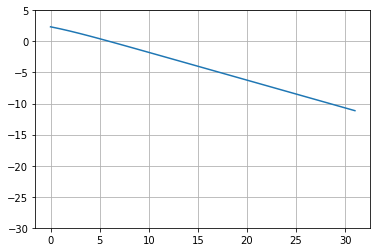


Punto fijo con cota de error 1e-11
La raiz encontrada es: 1147.596288534571, usando N = 65 iteraciones.

TABLA CON LOS DATOS OBTENIDOS

---------  ------------------  ----------------------  ---------------------  --------------------
Iteracion  Raiz                Error                   Orden de convergencia  Constante asintotica
1          1100                14.0                    0                      0
2          1114.0              10.522456000000147      0                      0
3          1124.5224560000001  7.563332417529182       0                      0.8296322697073751
4          1132.0857884175293  5.248889250905222       1.1563814943370807     0.78496667874204
5          1137.3346776684346  3.5489425409866726      1.1062861339534587     0.7485867589066642
61         1147.5962885344404  5.2523319027386606e-11  0.9929379258799085     0.27376238332080716
62         1147.596288534493   3.3651303965598345e-11  1.0260166507108632     0.2661717515373905
63         1147.59628

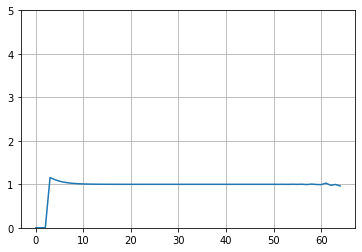


Grafico de la constante asintotica



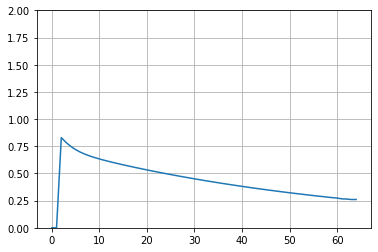


Grafico del de log de la variacion de x en funcion de las iteraciones



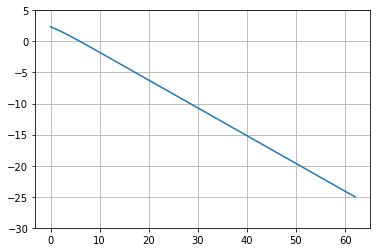

In [ ]:
def puntoFijo(p0, tolerancia, nIteraciones):
    i = 1
    historia = []
    errores = []
    historia.append(p0)

    while i < nIteraciones:
        p = g(p0)
        error = error_absoluto(p, p0)

        if error_absoluto(p, p0) < tolerancia:
            historia.append(p)
            errores.append(error)
            return historia, errores

        historia.append(p)
        errores.append(error)
        p0 = p
        i+=1
    
    return None

def ejecutar_algoritmo(tolerancia, nMax, semilla):
    iteraciones, errores = puntoFijo(semilla, tolerancia, nMax)

    if iteraciones != None:    
        print(f'La raiz encontrada es: {iteraciones[-1]}, usando N = {len(iteraciones)-1} iteraciones.')
        
        convergencias = ordenConvergencia(iteraciones, tolerancia)
        constantes = constanteAsintotica(iteraciones, convergencias[-1])
        imprimirDatosYGraficosObtenidos(iteraciones, convergencias, constantes, errores)

    else:
        print(f'Error, no se pudo encontrar la raiz con una tolerancia de {tolerancia} y {nMax} repeticiones.')


def main():
    print('\nPunto fijo con cota de error 1e-5')
    ejecutar_algoritmo(1e-5, 100, 1100)
    print('\nPunto fijo con cota de error 1e-11')
    ejecutar_algoritmo(1e-11, 100, 1100)

main()

### Método de Newton Raphson y Newton Raphson modificado

Los requisitos que tenemos para usar este método son que la semilla debe estar próxima a la raíz y, además, debe cumplirse que la derivada de la función dentro del intervalo en consideración no cambie de signo. Esto se debe a que la gráfica de la función f(x) en el intervalo de trabajo [a,b] debe ser cóncava o convexa, pero no puede tener puntos de inflexión. Si elegimos el intervalo [1100, 1200] y evaluamos f'(x) en ambos puntos:
- $f'(1100) = 230 $
- $f'(1200) = 520 $

Entonces la funcion cumple las condiciones de convergencia para aplicar el método.

Como el algoritmo converge muy rápido, al usar una cota de error $\varepsilon > 1\times 10^{-7}$, la diferencia entre 2 iteraciones consecutivas "da 0", como explicamos arriba. Por lo tanto, usaremos esta cota de error. Realizamos lo mismo con el método de Newton-Raphson modificado más abajo.

Utilizando la semilla $p_{0} =$ 1100:
-  Con la cota $\varepsilon < 1\times 10^{-5}$ La raiz encontrada es: 1147.59629 $\pm$ 0.00001, usando N = 5 iteraciones.
-  Con la cota $\varepsilon < 1\times 10^{-7}$ La raíz encontrada es: 1147.596289 $\pm$ 0.0000001, usando N = 5 iteraciones.

### Ventajas y desventajas del algoritmo
Este algoritmo tiene la ventaja de que converge cuadráticamente, lo que lo hace el método más eficiente entre los vistos en la materia. Las desventajas son que es necesario conocer la derivada de la funcion, y si se trata de Newton-Raphson modificado, también se necesita la derivada segunda. Al igual que con el método de punto fijo (que es un caso particular de NR) es necesario elegir una semilla que esté próxima a la raíz, ya que de lo contrario, el algoritmo diverge.



Metodo de Newton-Raphson con cota de error 1e-5


La raiz encontrada es: 1147.5962885345864, usando N = 5 iteraciones.

TABLA CON LOS DATOS OBTENIDOS

---------  ------------------  ----------------------  ---------------------  ---------------------
Iteracion  Raiz                Error                   Orden de convergencia  Constante asintotica
1          1100                60.869565217391255      0                      0
2          1160.8695652173913  12.625097495272485      0                      0
3          1148.2444677221188  0.6465051199490972      0                      0.0053712632754148604
4          1147.5979626021697  0.0016740563687562826   1.8892389168832373     0.0053712632754148604
5          1147.596288545801   1.1214524420211092e-08  1.8892389168832373     0.003816320905125097
---------  ------------------  ----------------------  ---------------------  ---------------------

Grafico del orden de convergencia



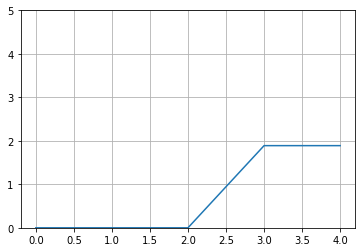


Grafico de la constante asintotica



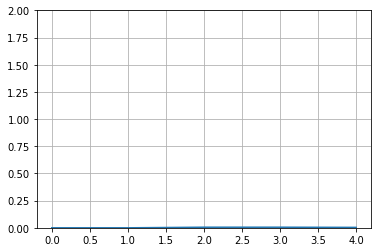


Grafico del de log de la variacion de x en funcion de las iteraciones



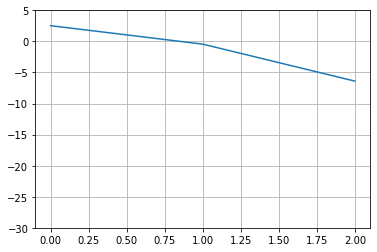


Metodo de Newton-Raphson con cota de error 1e-7


La raiz encontrada es: 1147.5962885345864, usando N = 5 iteraciones.

TABLA CON LOS DATOS OBTENIDOS

---------  ------------------  ----------------------  ---------------------  ---------------------
Iteracion  Raiz                Error                   Orden de convergencia  Constante asintotica
1          1100                60.869565217391255      0                      0
2          1160.8695652173913  12.625097495272485      0                      0
3          1148.2444677221188  0.6465051199490972      0                      0.0053712632754148604
4          1147.5979626021697  0.0016740563687562826   1.8892389168832373     0.0053712632754148604
5          1147.596288545801   1.1214524420211092e-08  1.8892389168832373     0.003816320905125097
---------  ------------------  ----------------------  ---------------------  ---------------------

Grafico del orden de convergencia



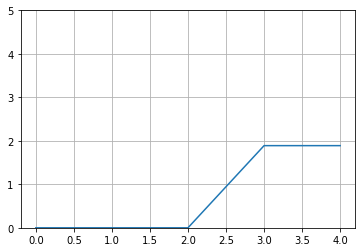


Grafico de la constante asintotica



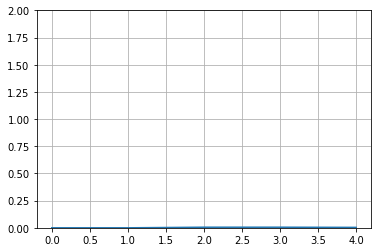


Grafico del de log de la variacion de x en funcion de las iteraciones



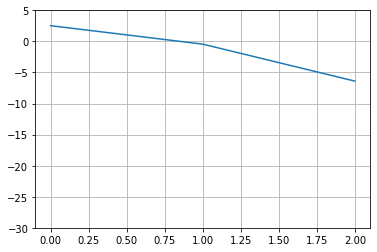

In [ ]:
def raices_multiples(p0):
    p = p0 - ((f(p0)*f_derivada(p0))/((f_derivada(p0))**2 - f(p0)*f_derivada_segunda(p0)))
    return p

def newton_raphson(p0, tolerancia, nIteraciones, multiple=False):
    historia = []
    errores = []
    historia.append(p0)
    i = 1
    boundZero = 1e-20

    while i < nIteraciones:
        if abs(f_derivada(p0)) < boundZero:
            return None

        if multiple == True:
            p = raices_multiples(p0)
        else:
            p = p0 - f(p0)/f_derivada(p0)

        error = error_absoluto(p, p0)
        if error_absoluto(p, p0) < tolerancia:
            historia.append(p)
            errores.append(error)
            return historia, errores
        
        p0 = p
        historia.append(p)
        errores.append(error)
        i+=1
    
    return -1

def implementar_metodo_nr(tolerancia, nMax, semilla, conRaicesMultiples = False):    
    iteraciones, errores = newton_raphson(semilla, tolerancia, nMax, False)

    if iteraciones != -1 and iteraciones != None:    
        print(f'\nLa raiz encontrada es: {iteraciones[-1]}, usando N = {len(iteraciones)-1} iteraciones.')
                
        convergencias = ordenConvergencia(iteraciones, tolerancia)
        constantes = constanteAsintotica(iteraciones, convergencias[-1])
        imprimirDatosYGraficosObtenidos(iteraciones, convergencias, constantes, errores)
      
    elif iteraciones == None:
        print('Error, la derivada de la funcion es 0 y no se puede dividir por cero.')
    else:
        print(f'Error, no se pudo encontrar la raiz con una tolerancia de {tolerancia} y {nMax} repeticiones.')


def main():
    print('\nMetodo de Newton-Raphson con cota de error 1e-5\n')
    implementar_metodo_nr(1e-5, 15, 1100, False)
    print('\nMetodo de Newton-Raphson con cota de error 1e-7\n')
    implementar_metodo_nr(1e-7, 15, 1100, False)
    
main()

Utilizando el método de Newton Raphson **modificado**:
- Con la cota $\varepsilon < 1\times 10^{-5}$ La raiz encontrada es 1147.59629 $\pm$ 0.00001, usando N = 5 iteraciones.
- Con la cota $\varepsilon < 1\times 10^{-7}$ La raiz encontrada es: 1147.596289 $\pm$ 0.0000001, usando N = 5 iteraciones.



Metodo de Newton-Raphson modificado con cota de error 1e-5


La raiz encontrada es: 1147.5962885345864, usando N = 5 iteraciones.

TABLA CON LOS DATOS OBTENIDOS

---------  ------------------  ----------------------  ---------------------  ---------------------
Iteracion  Raiz                Error                   Orden de convergencia  Constante asintotica
1          1100                60.869565217391255      0                      0
2          1160.8695652173913  12.625097495272485      0                      0
3          1148.2444677221188  0.6465051199490972      0                      0.0053712632754148604
4          1147.5979626021697  0.0016740563687562826   1.8892389168832373     0.0053712632754148604
5          1147.596288545801   1.1214524420211092e-08  1.8892389168832373     0.003816320905125097
---------  ------------------  ----------------------  ---------------------  ---------------------

Grafico del orden de convergencia



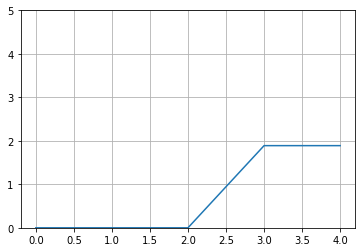


Grafico de la constante asintotica



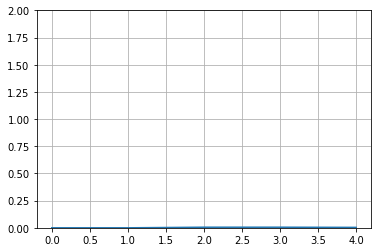


Grafico del de log de la variacion de x en funcion de las iteraciones



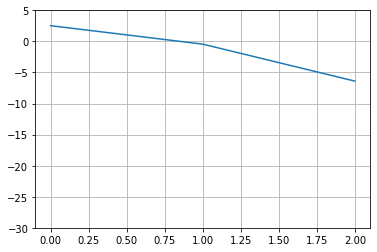


Metodo de Newton-Raphson modificado con cota de error 1e-7


La raiz encontrada es: 1147.5962885345864, usando N = 5 iteraciones.

TABLA CON LOS DATOS OBTENIDOS

---------  ------------------  ----------------------  ---------------------  ---------------------
Iteracion  Raiz                Error                   Orden de convergencia  Constante asintotica
1          1100                60.869565217391255      0                      0
2          1160.8695652173913  12.625097495272485      0                      0
3          1148.2444677221188  0.6465051199490972      0                      0.0053712632754148604
4          1147.5979626021697  0.0016740563687562826   1.8892389168832373     0.0053712632754148604
5          1147.596288545801   1.1214524420211092e-08  1.8892389168832373     0.003816320905125097
---------  ------------------  ----------------------  ---------------------  ---------------------

Grafico del orden de convergencia



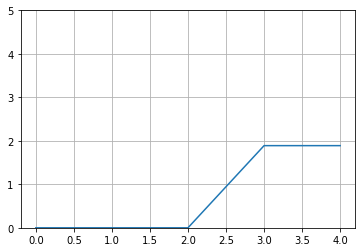


Grafico de la constante asintotica



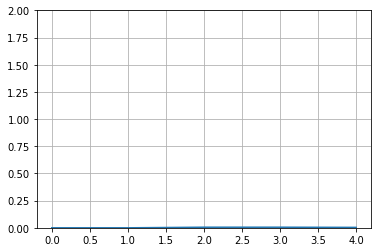


Grafico del de log de la variacion de x en funcion de las iteraciones



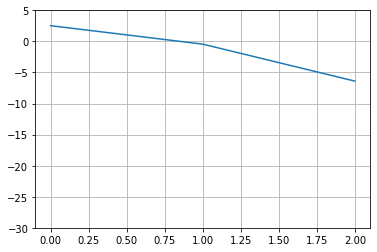

In [ ]:
print('\nMetodo de Newton-Raphson modificado con cota de error 1e-5\n')
implementar_metodo_nr(1e-5, 15, 1100, True)
print('\nMetodo de Newton-Raphson modificado con cota de error 1e-7\n')
implementar_metodo_nr(1e-7, 15, 1100, True)

### Método de la secante

Al igual que con los métodos anteriores, usamos una tolerancia mayor a $1\times 10^{-13}$ por lo explicado anteriormente.

Utilizando las semillas $p_{0} =$ 1100 y $p_{1} =$ 1200:
-  Con la cota $\varepsilon < 1\times 10^{-5}$ la raiz encontrada es: 1147.59629 $\pm$ 0.00001, usando N = 6 iteraciones.
-  Con la cota $\varepsilon < 1\times 10^{-12}$ la raiz encontrada es: 1147.596288534586 $\pm$ 0.000000000001, usando N = 7 iteraciones.

### Ventajas y desventajas del algoritmo
El método tiene un orden de convergencia supralineal, y en base a las iteraciones realizadas, pudimos observar que se requieren pocas iteraciones para encontrar la raíz con las cotas de error pedidas. Las desventajas son, principalmente, que se necesita elegir 2 semillas para aplicar el método, y si estas no se eligen adecuadamente, el algoritmo diverge. 


Metodo secante con cota de error 1e-5
La raiz encontrada es: 1147.5962885345862, usando N = 6 iteraciones.

TABLA CON LOS DATOS OBTENIDOS

---------  ------------------  ---------------------  ---------------------  ---------------------
Iteracion  Raiz                Error                  Orden de convergencia  Constante asintotica
1          1100                62.162162162162076     0                      0
2          1200                7.968602670931432      0                      0
3          1137.837837837838   1.8625172170980022     0                      0.0021890759703987123
4          1145.8064405087694  0.07319264894090338    4.320856006195343      0.0008088321260251032
5          1147.6689577258674  0.0005233054748714494  0.7076009249024686     0.018325394391479427
6          1147.5957650769265  1.521848389529623e-07  2.226632639112659      0.01832539439147942
---------  ------------------  ---------------------  ---------------------  ---------------------

Grafico del 

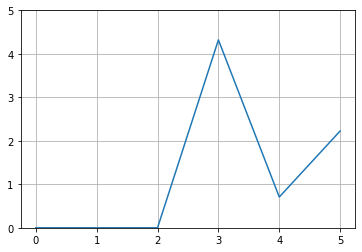


Grafico de la constante asintotica



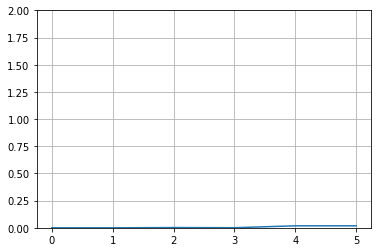


Grafico del de log de la variacion de x en funcion de las iteraciones



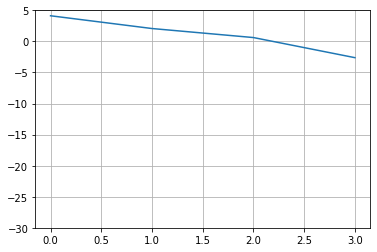


Metodo secante con cota de error 1e-12
La raiz encontrada es: 1147.5962885345855, usando N = 7 iteraciones.

TABLA CON LOS DATOS OBTENIDOS

---------  ------------------  ---------------------  ---------------------  --------------------
Iteracion  Raiz                Error                  Orden de convergencia  Constante asintotica
1          1100                62.162162162162076     0                      0
2          1200                7.968602670931432      0                      0
3          1137.837837837838   1.8625172170980022     0                      0.05501823590122215
4          1145.8064405087694  0.07319264894090338    4.320856006195343      0.014572938091984431
5          1147.6689577258674  0.0005233054748714494  0.7076009249024686     0.07836671516634593
6          1147.5957650769265  1.521848389529623e-07  2.226632639112659      0.02832414026336274
7          1147.5962883824013  6.821210263296962e-13  1.5265097254225422     0.028324140263362736
---------  -------

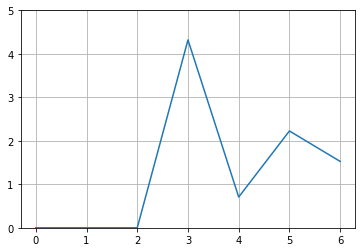


Grafico de la constante asintotica



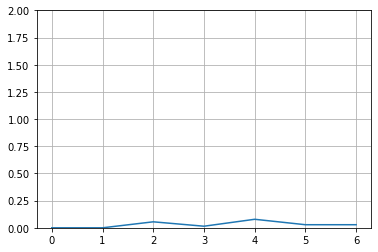


Grafico del de log de la variacion de x en funcion de las iteraciones



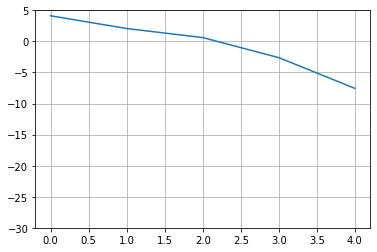

In [ ]:
def metodo_secante(x0, x1, tolerancia, nIteraciones):
    i = 0
    historia = []
    errores = []
    historia.append(x0)

    while i < nIteraciones:

        xi = x1 - (f(x1)*(x1 - x0))/(f(x1) - f(x0)) 
        error = error_absoluto(xi, x1)
        if error < tolerancia:
            historia.append(xi)
            errores.append(error)
            return historia, errores
        
        historia.append(x1)
        errores.append(error)
        i+= 1
        x0 = x1
        x1 = xi

    return -1

def ejecutar_algoritmo(tolerancia, nMax, x0, x1):
    iteraciones, errores = metodo_secante(x0, x1, tolerancia, nMax)

    if iteraciones != -1 and iteraciones != None:
        print(f'La raiz encontrada es: {iteraciones[-1]}, usando N = {len(iteraciones)-1} iteraciones.')
        
        convergencias = ordenConvergencia(iteraciones, tolerancia)
        constantes = constanteAsintotica(iteraciones, convergencias[-1])
        imprimirDatosYGraficosObtenidos(iteraciones, convergencias, constantes, errores)


    elif iteraciones == None:
        print('Error, no se puede dividir por 0')
    else:
        print(f'Error, no se pudo encontrar la raiz con una tolerancia de {tolerancia} y {nMax} repeticiones.')


def main():
    print('\nMetodo secante con cota de error 1e-5')
    ejecutar_algoritmo(1e-5, 100, 1100, 1200)
    print('\nMetodo secante con cota de error 1e-12')
    ejecutar_algoritmo(1e-11, 100, 1100, 1200)
main()

## 2. Interpolación por Spline

Se realizarán 3 splines con frontera ligada, en las dos tablas a continuación se encuentran los datos con los que se realizarán.

|   	| Curva 1 	|     	| Curva 2 	|     	| Curva 3 	|     	|
|---	|---------	|-----	|---------	|-----	|---------	|-----	|
| i 	| xi      	| f   	| xi      	| f   	| xi      	| f   	|
| 0 	| 1       	| 3.0 	| 17      	| 4.5 	| 27.7    	| 4.1 	|
| 1 	| 2       	| 3.7 	| 20      	| 7.0 	| 28      	| 4.3 	|
| 2 	| 5       	| 3.9 	| 23      	| 6.1 	| 29      	| 4.1 	|
| 3 	| 6       	| 4.2 	| 24      	| 5.6 	| 30      	| 3.0 	|
| 4 	| 7       	| 5.7 	| 25      	| 5.8 	|         	|     	|
| 5 	| 8       	| 6.6 	| 27      	| 5.2 	|         	|     	|
| 6 	| 10      	| 7.1 	| 27.7    	| 4.1 	|         	|     	|
| 7 	| 13      	| 6.7 	|         	|     	|         	|     	|
| 8 	| 17      	| 4.5 	|         	|     	|         	|     	|

|             	| x    	| pendiente en x 	|
|-------------	|------	|----------------	|
| **Curva 1** 	| 1    	| 1              	|
|             	| 17   	| -2/3           	|
| **Curva 2** 	| 17   	| 3              	|
|             	| 27.7 	| -4             	|
| **Curva 3** 	| 27.7 	| 1/3            	|
|             	| 30   	| -3/2           	|

### Planteo del problema

La Spline para la curva 1 constará de 8 polinomios de grado 3 
\begin{align}
S(x)=\left\{\begin{matrix}
 S_0(x)=a_0+b_0(x-1)+c_0(x-1)^{2}+d_0(x-1)^{3} \:  \:  \:  \: x\in [1;2]
 \\S_1(x)=a_1+b_1(x-2)+c_1(x-2)^{2}+d_1(x-2)^{3} \:  \:  \:  \: x\in [2;5]
 \\S_2(x)=a_2+b_2(x-5)+c_2(x-5)^{2}+d_2(x-5)^{3}  \:  \:  \:  \: x\in [5;6]
 \\S_3(x)=a_3+b_3(x-6)+c_3(x-6)^{2}+d_3(x-6)^{3}  \:  \:  \:  \: x\in [6;7]
 \\S_4(x)=a_4+b_4(x-7)+c_4(x-7)^{2}+d_4(x-7)^{3}  \:  \:  \:  \: x\in [7;8]
 \\S_5(x)=a_5+b_5(x-8)+c_5(x-8)^{2}+d_5(x-8)^{3}  \:  \:  \:  \: x\in [8;10]
 \\S_6(x)=a_6+b_6(x-10)+c_6(x-10)^{2}+d_6(x-10)^{3}  \:  \:  \:  \: x\in [10;13]
 \\S_7(x)=a_7+b_7(x-13)+c_7(x-13)^{2}+d_7(x-13)^{3}  \:  \:  \:  \: x\in [13;17]
\end{matrix}\right.
    \end{align}

Para el caso de la curva 2, la Spline contará con 6 polinomios de grado 3  
\begin{align}
S(x)=\left\{\begin{matrix}
 S_0(x)=a_0+b_0(x-17)+c_0(x-17)^{2}+d_0(x-17)^{3} \:  \:  \:  \: x\in [17;20]
 \\S_1(x)=a_1+b_1(x-20)+c_1(x-20)^{2}+d_1(x-20)^{3} \:  \:  \:  \: x\in [20;23]
 \\S_2(x)=a_2+b_2(x-23)+c_2(x-23)^{2}+d_2(x-23)^{3}  \:  \:  \:  \: x\in [23;24]
 \\S_3(x)=a_3+b_3(x-24)+c_3(x-24)^{2}+d_3(x-24)^{3}  \:  \:  \:  \: x\in [24;25]
 \\S_4(x)=a_4+b_4(x-25)+c_4(x-25)^{2}+d_4(x-25)^{3}  \:  \:  \:  \: x\in [25;27]
 \\S_5(x)=a_5+b_5(x-27)+c_5(x-27)^{2}+d_5(x-27)^{3}  \:  \:  \:  \: x\in [27;27.7]
\end{matrix}\right.
\end{align}

Y para la curva 3 la Spline contará con 3 polinomios de grado 3  
\begin{align}
S(x)=\left\{\begin{matrix}
 S_0(x)=a_0+b_0(x-27.7)+c_0(x-27.7)^{2}+d_0(x-27.7)^{3} \:  \:  \:  \: x\in [27.7;28]
 \\S_1(x)=a_1+b_1(x-28)+c_1(x-28)^{2}+d_1(x-28)^{3} \:  \:  \:  \: x\in [28;29]
 \\S_2(x)=a_2+b_2(x-29)+c_2(x-29)^{2}+d_2(x-29)^{3}  \:  \:  \:  \: x\in [29;30]
\end{matrix}\right.
\end{align}

### Planteo para obtener los coeficientes

Para obtener cada uno de los aᵢ, bᵢ, cᵢ y dᵢ plantearemos lo siguiente para cada Spline:  
_Condiciones comunes a todas las Splines_  
\begin{align}
S_j(x_j)=f(x_j) \:\:\: y \:\:\: S_j(x_{j+1})=f(x_{j+1})\:\:\:\forall\:\:\:j=0,1,...,n-1 \\
S_{j+1}(x_{j+1})=S_j(x_{j+1})\:\:\:\forall\:\:\:j=0,1,...,n-2\\
S'_{j+1}(x_{j+1})=S'_j(x_{j+1})\:\:\:\forall\:\:\:j=0,1,...,n-2\\
S''_{j+1}(x_{j+1})=S''_j(x_{j+1})\:\:\:\forall\:\:\:j=0,1,...,n-2\\
\end{align}
_Condición por ser Splines con frontera ligada_  
\begin{align}
S'(x_{0})=f'(x_{0})  \:\:\: y \:\:\: S'(x_{n})=f'(x_{n})
\end{align}

Para resolverlo plantearemos un sistema Ax=b en donde x es el vector que contiene a todos los cᵢ

#### Sistema Ax=b para la Spline 1

Enunciamos al teorema 3.12 del libro de Richard L. Burden, Douglas J. Faires y Annette M. Burden (página 114):  

> _Se define a f en x0 < x1 < ···< xn y es diferenciable en a y b, entonces f tiene un único spline interpolante S  condicionado en los nodos x0, x1,... ,xn; es decir, un spline interpolante que satisface las condiciones de frontera condicionada S'(x0) = f'(x0) y S'(xn) = f'(xn)._

Tras el despeje de las ecuaciones se llega a un sistema lineal Ax=b en el que reemplazando para la cantidad de puntos a interpolar con cada Spline se llega a lo siguiente:

Para el caso de la Spline para la curva 1  las matrices A, x y b son  
\begin{align}
A=\begin{bmatrix}
2h_0 & h_0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
h_0 & 2(h_0+h_1) & h_1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
0 & h_1 & 2(h_1+h_2) & h_2 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 0 & h_2 & 2(h_2+h_3) & h_3 & 0 & 0 & 0 & 0 \\ 
0 & 0 & 0 & h_3 & 2(h_3+h_4) & h_4 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 0 & h_4 & 2(h_4+h_5) & h_5 & 0 & 0 \\ 
0 & 0 & 0 & 0 & 0 & h_5 & 2(h_5+h_6) & h_6 & 0 \\ 
0 & 0 & 0 & 0 & 0 & 0 & h_6 & 2(h_6+h_7) & h_7 \\ 
0 & 0 & 0 & 0 & 0 & 0 & 0 & h_7 & 2h_7 \\ 
\end{bmatrix}\\
x= \begin{bmatrix}
c_0 \\
c_1 \\
c_2 \\
c_3 \\
c_4 \\
c_5 \\
c_6 \\
c_7 \\
c_8 \\
\end{bmatrix}\\
b= \begin{bmatrix}
\frac{3}{h_0}(a_1-a_0)-3f'(x_0) \\
\frac{3}{h_1}(a_2-a_1)-\frac{3}{h_0}(a_1-a_0) \\
\frac{3}{h_2}(a_3-a_2)-\frac{3}{h_1}(a_2-a_1) \\
\frac{3}{h_3}(a_4-a_3)-\frac{3}{h_2}(a_3-a_2) \\
\frac{3}{h_4}(a_5-a_4)-\frac{3}{h_3}(a_4-a_3) \\
\frac{3}{h_5}(a_6-a_5)-\frac{3}{h_4}(a_5-a_4) \\
\frac{3}{h_6}(a_7-a_6)-\frac{3}{h_5}(a_6-a_5) \\
\frac{3}{h_7}(a_8-a_7)-\frac{3}{h_6}(a_7-a_6) \\
3f'(x_8)-\frac{3}{h_7}(a_8-a_7) \\ 
\end{bmatrix}
\end{align}
En donde    
\begin{align}
h_j=x_{j+1}-x_j\\
a_i=f(x_i)
\end{align}
  
| i 	| ai  	| hi 	|
|---	|-----	|----	|
| 0 	| 3.0 	| 1  	|
| 1 	| 3.7 	| 3  	|
| 2 	| 3.9 	| 1  	|
| 3 	| 4.2 	| 1  	|
| 4 	| 5.7 	| 1  	|
| 5 	| 6.6 	| 2  	|
| 6 	| 7.1 	| 3  	|
| 7 	| 6.7 	| 4  	|
| 8 	| 4.5 	| -  	|


In [ ]:
valores_a_1 = [3.0, 3.7, 3.9, 4.2, 5.7, 6.6, 7.1, 6.7, 4.5]
valores_h_1 = [1, 3, 1, 1, 1, 2, 3, 4]

De esta forma, el sistema Ax=b para la primer Spline queda  
\begin{align}
\begin{bmatrix}
2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 8 & 3 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 3 & 8 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 4 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 4 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 6 & 2 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 2 & 10 & 3 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 3 & 14 & 4 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 4 & 8 \\
\end{bmatrix}
 \begin{bmatrix}
c_0 \\
c_1 \\
c_2 \\
c_3 \\
c_4 \\
c_5 \\
c_6 \\
c_7 \\
c_8 \\
\end{bmatrix} 
= \begin{bmatrix}
-0.9 \\
-1.9 \\
0.7 \\
3.6 \\
-1.8 \\
-1.95 \\
-1.15 \\
-1.25 \\
-0.35 \\
\end{bmatrix}
\end{align}

In [ ]:
matriz_a_1 = [[2, 1, 0, 0, 0, 0,  0,  0, 0], \
              [1, 8, 3, 0, 0, 0,  0,  0, 0], \
              [0, 3, 8, 1, 0, 0,  0,  0, 0], \
              [0, 0, 1, 4, 1, 0,  0,  0, 0], \
              [0, 0, 0, 1, 4, 1,  0,  0, 0], \
              [0, 0, 0, 0, 1, 6,  2,  0, 0], \
              [0, 0, 0, 0, 0, 2, 10,  3, 0], \
              [0, 0, 0, 0, 0, 0,  3, 14, 4], \
              [0, 0, 0, 0, 0, 0,  0,  4, 8]]

matriz_b_1 = [-0.9, -1.9, 0.7, 3.6, -1.8, -1.95, -1.15, -1.25, -0.35]

#### Sistema Ax=b para la Spline 2

Para el caso de la Spline para la curva 2 las matrices A, x y b son  
\begin{align}
A=\begin{bmatrix}
2h_0 & h_0 & 0 & 0 & 0 & 0 & 0 \\
h_0 & 2(h_0+h_1) & h_1 & 0 & 0 & 0 & 0 \\
0 & h_1 & 2(h_1+h_2) & h_2 & 0 & 0 & 0 \\
0 & 0 & h_2 & 2(h_2+h_3) & h_3 & 0 & 0 \\
0 & 0 & 0 & h_3 & 2(h_3+h_4) & h_4 & 0 \\
0 & 0 & 0 & 0 & h_4 & 2(h_4+h_5) & h_5 & 0 \\
0 & 0 & 0 & 0 & 0 & h_5 & 2h_5 \\
\end{bmatrix}\\
x= \begin{bmatrix}c_0 \\c_1 \\c_2 \\c_3 \\c_4 \\c_5\\c_6\\\end{bmatrix}\\
b= \begin{bmatrix}
\frac{3}{h_0}(a_1-a_0)-3f'(x_0) \\
\frac{3}{h_1}(a_2-a_1)-\frac{3}{h_0}(a_1-a_0) \\
\frac{3}{h_2}(a_3-a_2)-\frac{3}{h_1}(a_2-a_1) \\
\frac{3}{h_3}(a_4-a_3)-\frac{3}{h_2}(a_3-a_2) \\
\frac{3}{h_4}(a_5-a_4)-\frac{3}{h_3}(a_4-a_3) \\
\frac{3}{h_5}(a_6-a_5)-\frac{3}{h_4}(a_5-a_4) \\
3f'(x_6)-\frac{3}{h_5}(a_6-a_5) \\
\end{bmatrix}
\end{align}


En donde    
\begin{align}
h_j=x_{j+1}-x_j\\
a_i=f(x_i)
\end{align}
  
| i 	| ai  	| hi 	|
|---	|-----	|----	|
| 0 	| 4.5 	| 3  	|
| 1 	| 7.0 	| 3  	|
| 2 	| 6.1 	| 1  	|
| 3 	| 5.6 	| 1  	|
| 4 	| 5.8 	| 2  	|
| 5 	| 5.2 	| 0.7 |
| 6 	| 4.1 	| -  	|

In [ ]:
valores_a_2 = [4.5, 7.0, 6.1, 5.6, 5.8, 5.2, 4.1]
valores_h_2 = [3, 3, 1, 1, 2, 0.7]

De esta forma, el sistema Ax=b para la segunda Spline queda  
\begin{align}
\begin{bmatrix}
6 & 3 & 0 & 0 & 0 & 0 & 0 \\
3 & 12 & 3 & 0 & 0 & 0 & 0 \\
0 & 3 & 8 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 4 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 6 & 2 & 0 \\
0 & 0 & 0 & 0 & 2 & 5.4 & 0.7 \\
0 & 0 & 0 & 0 & 0 & 0.7 & 1.4 \\
\end{bmatrix}
\begin{bmatrix}c_0 \\c_1 \\c_2 \\c_3 \\c_4 \\c_5 \\c_6 \\\end{bmatrix}
 = 
\begin{bmatrix}-6.5 \\-3.4 \\-0.6 \\2.1 \\-1.5 \\-3.8142857 \\-7.2857143 \end{bmatrix}
\end{align}

In [ ]:
matriz_a_2 = [[6,  3, 0, 0, 0,   0,   0], \
              [3, 12, 3, 0, 0,   0,   0], \
              [0,  3, 8, 1, 0,   0,   0], \
              [0,  0, 1, 4, 1,   0,   0], \
              [0,  0, 0, 1, 6,   2,   0], \
              [0,  0, 0, 0, 2, 5.4, 0.7], \
              [0,  0, 0, 0, 0, 0.7, 1.4]]

matriz_b_2 = [-6.5, -3.4, -0.6, 2.1, -1.5, -3.8142857, -7.2857143]

#### Sistema Ax=b para la Spline 3

Para el caso de la Spline para la curva 3 las matrices A, x y b son  
\begin{align}
A=\begin{bmatrix}
2h_0 & h_0 & 0 & 0\\
h_0 & 2(h_0+h_1) & h_1 & 0\\
0 & h_1 & 2(h_1+h_2) & h_2\\
0 & 0 & h_2 & 2h_2\\
\end{bmatrix}\\
x= \begin{bmatrix}c_0 \\c_1 \\c_2 \\c_3 \\
\end{bmatrix}\\
b= \begin{bmatrix}
\frac{3}{h_0}(a_1-a_0)-3f'(x_0) \\
\frac{3}{h_1}(a_2-a_1)-\frac{3}{h_0}(a_1-a_0) \\
\frac{3}{h_2}(a_3-a_2)-\frac{3}{h_1}(a_2-a_1) \\
3f'(x_3)-\frac{3}{h_2}(a_3-a_2) \\
\end{bmatrix}
\end{align}

En donde    
\begin{align}
h_j=x_{j+1}-x_j\\
a_i=f(x_i)
\end{align}
  
| i 	| ai  	| hi 	|
|---	|-----	|----	|
| 0 	| 4.1 	| 0.3 |
| 1 	| 4.3 	| 1  	|
| 2 	| 4.1 	| 1  	|
| 3 	| 3.0 	| -  	|

In [ ]:
valores_a_3 = [4.1, 4.3, 4.1, 3.0]
valores_h_3 = [0.3, 1, 1]

De esta forma, el sistema Ax=b para la tercer Spline queda
\begin{align}
\begin{bmatrix}
0.6 & 0.3 & 0 & 0 \\
0.3 & 2.6 & 1 & 0 \\
0 & 1 & 4 & 1 \\
0 & 0 & 1 & 2 \\
\end{bmatrix}
\begin{bmatrix}c_0 \\c_1 \\c_2 \\c_3 \\
\end{bmatrix}
= \begin{bmatrix}
1 \\
-2.6 \\
-2.7 \\
-1.2 \\
\end{bmatrix}
\end{align}

In [ ]:
matriz_a_3  = [[0.6, 0.3, 0, 0], \
               [0.3, 2.6, 1, 0], \
               [  0,   1, 4, 1], \
               [  0,   0, 1, 2]]

matriz_b_3 = [1, -2.6, -2.7, -1.2]

### Resolución de los sistemas Ax=b

Para resolver los sistemas utilizaremos la factorización LU de la matriz A.  
A continuación se encuentra el código que lo resuelve.

In [ ]:
def crear_l_u_vacias(n):
  u = []
  l = []
  for i in range(n):
    aux_u = []
    aux_l = []
    for j in range(n):
      aux_u.append(0)
      x = 1 if i == j else 0
      aux_l.append(x)
    u.append(aux_u)
    l.append(aux_l)
  return l, u


def factorizacion_LU(a, n):
  l, u = crear_l_u_vacias(n)

  for i in range(n):
    for j in range(i, n):
      sum = 0
      for k in range(i):
        sum += l[i][k] * u[k][j]
      u[i][j] = a[i][j] - sum

    for j in range(i, n):
      if i == j:
        continue

      sum = 0
      for k in range(i):
        sum += l[j][k] * u[k][i]
      l[j][i] = (a[j][i] - sum) / u[i][i]
  return l, u


def resolver_factorizado(a, b, n):
  y = []
  y.append(b[0] / a[0][0])
  for i in range(2, n + 1):
    sum = 0
    for j in range(1, i):
      sum += a[i-1][j-1] * y[j-1]
    y.append((b[i-1] - sum) / a[i-1][i-1])
  return y


def resolver(a, b):
  n = len(a)
  l, u = factorizacion_LU(a, n)

  y = resolver_factorizado(l, b, n)

  for arr in u:
    arr.reverse()
  u.reverse()
  y.reverse()

  x = resolver_factorizado(u, y, n)
  x.reverse()
  return x

In [ ]:
# Código para imprimir prolijo

def imprimir(variable, valores):
  print('\n'.join(f"{variable}{i} = {'' if valores[i] < 0 else ' '}{round(valores[i], 15)}" for i in range(len(valores))))
  

A continuación resolvemos cada uno de los sistemas Ax=b para cada spline.

#### Resolución del sistema para la Spline 1

In [ ]:
valores_c_1 = resolver(matriz_a_1, matriz_b_1)
imprimir('c', valores_c_1)

c0 = -0.346809861280218
c1 = -0.206380277439564
c2 =  0.032617360265576
c3 =  1.058201950194083
c4 = -0.665425161041907
c5 = -0.196501306026454
c6 = -0.052783501399686
c7 = -0.076387457983412
c8 = -0.005556271008294


#### Resolución del sistema para la Spline 2

In [ ]:
valores_c_2 = resolver(matriz_a_2, matriz_b_2)
imprimir('c', valores_c_2)

c0 = -1.100708451071858
c1 =  0.034750235477049
c2 = -0.171625824169673
c3 =  0.668755886926235
c4 = -0.403397723535266
c5 =  0.12581522714268
c6 = -5.266989256428483


#### Resolución del sistema para la Spline 3

In [ ]:
valores_c_3 = resolver(matriz_a_3, matriz_b_3)
imprimir('c', valores_c_3)

c0 =  2.244224422442244
c1 = -1.155115511551155
c2 = -0.26996699669967
c3 = -0.465016501650165


### Interpolación de los datos (despeje del resto de las variables)

El despeje de las variables restantes (bᵢ y dᵢ) devuelve:  
\begin{align}
\\b_i=\frac{(a_{i+1}-a_i)}{h_i}-\frac{h_i(c_{i+1}+2c_i)}{3}\\
d_i=\frac{c_{i+1}-c_i}{3h_i}
\end{align}
(Extraido del libro - página 116)

In [ ]:
def obtener_valores_b(valores_a, valores_c, valores_h):
  valores_b = []
  for i in range(len(valores_a) - 1):
    a = (valores_a[i+1] - valores_a[i]) / valores_h[i]
    c = valores_h[i] * (valores_c[i+1] + 2 * valores_c[i]) / 3
    valores_b.append(a - c)
  return valores_b

def obtener_valores_d(valores_c, valores_h):
  valores_d = []
  for i in range(len(valores_c) - 1):
   valores_d.append((valores_c[i+1] - valores_c[i]) / (3 * valores_h[i]))
  return valores_d

In [ ]:
def format(num):
  space, n = (" ", 12) if num >= 0 else ("", 13)
  str_num = str(num)
  return space + str_num + "0" * (n - len(str_num))

def tabla_de_valores(a, b, c, d):
  print("·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·")
  print(f"|  a  |        b\t| \t c\t| \t d\t| i |")
  print("·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·")
  for i in range(len(d)):
    ai = round(a[i], 10)
    bi = format(round(b[i], 10))
    ci = format(round(c[i], 10))
    di = format(round(d[i], 10))
    sym = "|" if i % 2 == 0 else "·"
    print(f"{sym} {ai} {sym} {bi}\t{sym} {ci}\t{sym} {di}\t{sym} {i} {sym}")
  print("-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-")

#### Resolvemos para la primer Spline

In [ ]:
valores_b_1 = obtener_valores_b(valores_a_1, valores_c_1, valores_h_1)
valores_d_1 = obtener_valores_d(valores_c_1, valores_h_1)

In [ ]:
tabla_de_valores(valores_a_1, valores_b_1, valores_c_1, valores_d_1)

·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·
|  a  |        b	| 	 c	| 	 d	| i |
·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·
| 3.0 |  1.0000000000	| -0.3468098613	|  0.0468098613	| 0 |
· 3.7 ·  0.4468098613	· -0.2063802774	·  0.0265552931	· 1 ·
| 3.9 | -0.0744788902	|  0.0326173603	|  0.3418615300	| 2 |
· 4.2 ·  1.0163404202	·  1.0582019502	· -0.5745423704	· 3 ·
| 5.7 |  1.4091172094	| -0.6654251610	|  0.1563079517	| 4 |
· 6.6 ·  0.5471907423	· -0.1965013060	·  0.0239529674	· 5 ·
| 7.1 |  0.0486211274	| -0.0527835014	| -0.0026226618	| 6 |
· 6.7 · -0.3388917507	· -0.0763874580	·  0.0059025989	· 7 ·
-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-


#### Resolvemos para la segunda Spline

In [ ]:
valores_b_2 = obtener_valores_b(valores_a_2, valores_c_2, valores_h_2)
valores_d_2 = obtener_valores_d(valores_c_2, valores_h_2)

In [ ]:
tabla_de_valores(valores_a_2, valores_b_2, valores_c_2, valores_d_2)

·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·
|  a  |        b	| 	 c	| 	 d	| i |
·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·
| 4.5 |  3.0000000000	| -1.1007084511	|  0.1261620763	| 0 |
· 7.0 · -0.1978746468	·  0.0347502355	· -0.0229306733	· 1 ·
| 6.1 | -0.6085014129	| -0.1716258242	|  0.2801272370	| 2 |
· 5.6 · -0.1113713501	·  0.6687558869	· -0.3573845368	· 3 ·
| 5.8 |  0.1539868133	| -0.4033977235	|  0.0882021584	| 4 |
· 5.2 · -0.4011781843	·  0.1258152271	· -2.5680021350	· 5 ·
-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-


#### Resolvemos para la tercera Spline

In [ ]:
valores_b_3 = obtener_valores_b(valores_a_3, valores_c_3, valores_h_3)
valores_d_3 = obtener_valores_d(valores_c_3, valores_h_3)

In [ ]:
tabla_de_valores(valores_a_3, valores_b_3, valores_c_3, valores_d_3)

·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·
|  a  |        b	| 	 c	| 	 d	| i |
·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·
| 4.1 |  0.3333333333	|  2.2442244224	| -3.7770443711	| 0 |
· 4.3 ·  0.6600660066	· -1.1551155116	·  0.2950495050	· 1 ·
| 4.1 | -0.7650165017	| -0.2699669967	| -0.0650165017	| 2 |
-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-


### Gráfico de las Splines

In [ ]:
def spline1(x):
  if not 1 <= x <= 17:
    return None
  i = 0 if x <=  2 else \
      1 if x <=  5 else \
      2 if x <=  6 else \
      3 if x <=  7 else \
      4 if x <=  8 else \
      5 if x <= 10 else \
      6 if x <= 13 else 7
  x_n = [1, 2, 5, 6, 7, 8, 10, 13]
  a = valores_a_1[i]
  b = valores_b_1[i]
  c = valores_c_1[i]
  d = valores_d_1[i]
  n = x_n[i]
  return a + b * (x - n) + c * (x - n)**2 + d * (x - n)**3

def spline2(x):
  if not 17 <= x <= 27.7:
    return None
  i = 0 if x <= 20 else \
      1 if x <= 23 else \
      2 if x <= 24 else \
      3 if x <= 25 else \
      4 if x <= 27 else 5
  x_n = [17, 20, 23, 24, 25, 27]
  a = valores_a_2[i]
  b = valores_b_2[i]
  c = valores_c_2[i]
  d = valores_d_2[i]
  n = x_n[i]
  return a + b * (x - n) + c * (x - n)**2 + d * (x - n)**3

def spline3(x):
  if not 27.7 <= x <= 30:
    return None
  i = 0 if x <= 28 else \
      1 if x <= 29 else 2
  x_n = [27.7, 28, 29]
  a = valores_a_3[i]
  b = valores_b_3[i]
  c = valores_c_3[i]
  d = valores_d_3[i]
  n = x_n[i]
  return a + b * (x - n) + c * (x - n)**2 + d * (x - n)**3

def f(x):
  if not 1 <= x <= 30:
    return None
  return spline1(x) if 0 <= x <= 17 else spline2(x) if 17 <= x <= 27.7 else spline3(x)

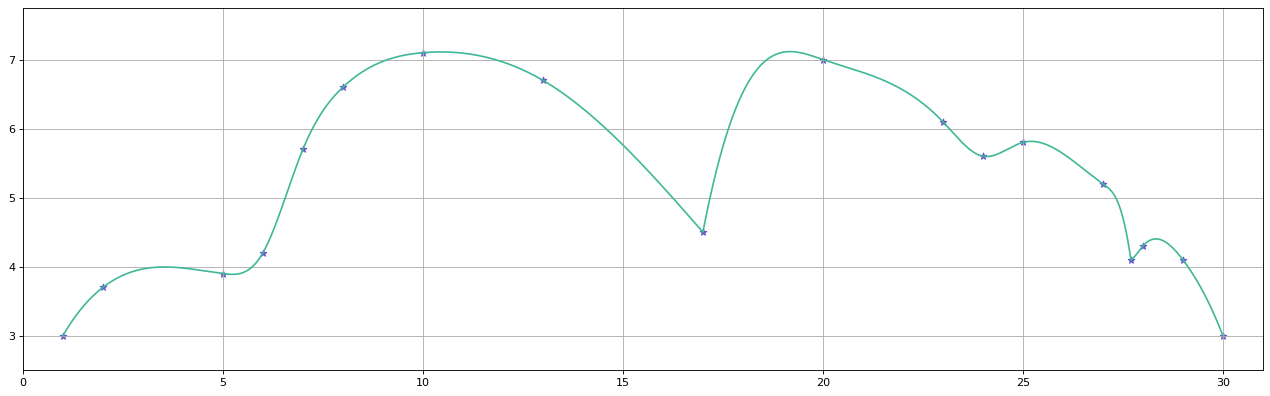

In [ ]:
plt.figure(figsize=(20, 6), dpi=80)

xn = [1, 2, 5, 6, 7, 8, 10, 13, 17, 20, 23, 24, 25, 27, 27.7, 28, 29, 30]
yn = [3.0, 3.7, 3.9, 4.2, 5.7, 6.6, 7.1, 6.7, 4.5, 7.0, 6.1, 5.6, 5.8, 5.2, 4.1, 4.3, 4.1, 3.0]
plt.scatter(xn, yn, marker="*", color='#6656ce')

x = [i/100000 for i in range(100000, 3100000)]
plt.plot(x, [f(i) for i in x], color='#3fb898')

plt.xlim(0, 31)
plt.ylim(2.5, 7.75)
plt.grid()
plt.show()